# User OverView Analysis

### Imporet packages

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sys

sys.path.append(os.path.abspath(os.path.join("../script")))
from ploting_utils import PlotingUtils


### Read the clean data extracted using Data-Cleaning-Transformation-Extraction.ipynb

In [35]:
clean_data = pd.read_csv('../data/clean_data.csv')
print(clean_data.shape)
clean_data = clean_data.dropna()
clean_data.info()

/var/folders/6b/0t1qb1d92f72c46kvp35pwfc0000gn/T/ipykernel_21432/578822464.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_data = pd.read_csv('../data/clean_data.csv')


(148935, 45)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148935 entries, 0 to 148934
Data columns (total 45 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Bearer Id                       148935 non-null  object 
 1   Start                           148935 non-null  object 
 2   Start ms                        148935 non-null  float64
 3   End                             148935 non-null  object 
 4   End ms                          148935 non-null  float64
 5   Dur. (ms)                       148935 non-null  float64
 6   IMSI                            148935 non-null  float64
 7   MSISDN/Number                   148935 non-null  float64
 8   IMEI                            148935 non-null  float64
 9   Last Location Name              148935 non-null  object 
 10  Avg RTT DL (ms)                 148935 non-null  float64
 11  Avg RTT UL (ms)                 148935 non-null  float64
 12  Avg

In [36]:
#get name of columns
clean_data.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'Activity Duration DL (ms)', 'Activity Duration UL (ms)', 'Dur. (ms).1',
       'Handset Manufacturer', 'Handset Type', 'Nb of sec with Vol DL < 6250B',
       'Nb of sec with Vol UL < 1250B', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',


## Task1.0

### Top 10 handsets used by the customers

1394 users
Number of posts per user


<AxesSubplot:>

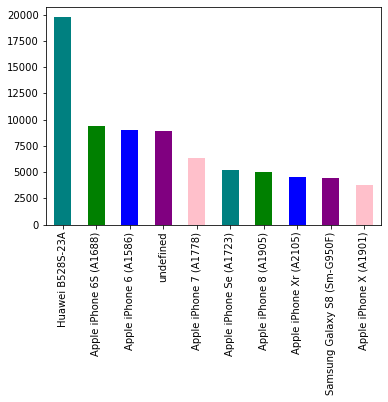

In [37]:
handset_count = clean_data['Handset Type'].value_counts()
print(len(handset_count), "users")
print("Number of posts per user")
handset_count[:10].plot(kind='bar', color=['teal', 'green', 'blue','purple','pink'])


### Top 3 handset manufacturers

170 users
Number of posts per user


<AxesSubplot:>

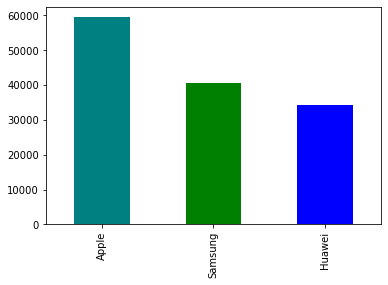

In [38]:
handset_manufacturer = clean_data['Handset Manufacturer'].value_counts()
print(len(handset_manufacturer), "users")
print("Number of posts per user")
handset_manufacturer[:3].plot(
    kind='bar', color=['teal', 'green', 'blue'])


### Top 5 handsets per top 3 manufacturers

In [39]:
handset_man= clean_data[clean_data['Handset Manufacturer'].isin(['Apple','Samsung','Huawei'])]
handset = handset_man.groupby('Handset Manufacturer')['Handset Type'].value_counts()
apple = handset.Apple[:5]
sumsung = handset.Samsung[:5]
huawei = handset.Huawei[:5]


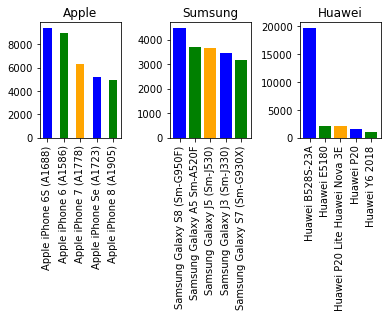

In [40]:
fig, ax = plt.subplots(1, 3)

ax[0].bar(apple.keys(), apple.values, tick_label=apple.keys(),
          width=.5, color=['blue', 'green', 'orange'])
ax[0].set_title('Apple')
ax[0].tick_params(axis='x', labelrotation=90)

ax[1].bar(sumsung.keys(), sumsung.values, tick_label=sumsung.keys(),
          width=0.8, color=['blue', 'green', 'orange'])
ax[1].set_title('Sumsung')
ax[1].tick_params(axis='x', labelrotation=90)

ax[2].bar(huawei.keys(), huawei.values, tick_label=huawei.keys(),
          width=0.8, color=['blue', 'green', 'orange'])
ax[2].set_title('Huawei')
ax[2].tick_params(axis='x', labelrotation=90)
plt.subplots_adjust(left=0.2, right=0.99,
                    bottom=0.2, top=0.6,
                    wspace=0.6, hspace=0.4)


# Task 1.1

In [41]:
session_count = clean_data.groupby('IMEI').agg(
    {'Bearer Id': ['count']}).reset_index()

session_count[session_count['Bearer Id']['count'] > 10]


,IMEI,Bearer Id
,,count
1832,3.517151e+13,12
2653,3.518231e+13,18
7575,3.528141e+13,12
7597,3.528141e+13,17
7842,3.528141e+13,11
8130,3.528501e+13,11
15909,3.533251e+13,11
23579,3.540531e+13,15
25501,3.540751e+13,12


In [42]:

session_duration = clean_data.groupby('MSISDN/Number').agg(
    {'Dur. (ms)': ['sum']}).reset_index()

session_duration[session_duration['Dur. (ms)']['sum'] > 1000000]

,MSISDN/Number,Dur. (ms)
,,sum
480,3.360234e+10,1069729.0
666,3.360313e+10,6287761.0
1009,3.360371e+10,1050599.0
1279,3.360452e+10,5207990.0
1613,3.360648e+10,1561253.0
...,...,...
106137,3.378632e+10,4059652.0
106459,3.378757e+10,1081998.0
106571,3.378807e+10,1090180.0


In [43]:

total_download_upload = clean_data.groupby('MSISDN/Number').agg(
    {'Total DL (Bytes)': 'sum', 'Total UL (Bytes)': 'sum'}).reset_index()

total_download_upload


,MSISDN/Number,Total DL (Bytes),Total UL (Bytes)
0,3.360100e+10,8.426375e+08,36053108.0
1,3.360100e+10,1.207552e+08,36104459.0
2,3.360100e+10,5.566597e+08,39306820.0
3,3.360101e+10,4.019932e+08,20327526.0
4,3.360101e+10,1.363130e+09,94280527.0
...,...,...,...
106851,3.379000e+10,6.879252e+08,26716429.0
106852,3.379000e+10,4.445751e+08,35732243.0
106853,3.197021e+12,1.948281e+08,37295915.0
106854,3.370000e+14,5.396350e+08,56652839.0


In [44]:

total_youtube_data = clean_data.groupby('MSISDN/Number').agg(
    {'Youtube DL (Bytes)': 'sum', 'Youtube UL (Bytes)': 'sum'}).reset_index()

In [45]:

total_socialmedia_data = clean_data.groupby('MSISDN/Number').agg(
    {'Social Media DL (Bytes)': 'sum', 'Social Media UL (Bytes)': 'sum'}).reset_index()
total_socialmedia_data


,MSISDN/Number,Social Media DL (Bytes),Social Media UL (Bytes)
0,3.360100e+10,2206504.0,25631.0
1,3.360100e+10,2598548.0,62017.0
2,3.360100e+10,3148004.0,47619.0
3,3.360101e+10,251469.0,28825.0
4,3.360101e+10,2861230.0,51312.0
...,...,...,...
106851,3.379000e+10,234320.0,65863.0
106852,3.379000e+10,442214.0,56355.0
106853,3.197021e+12,668596.0,46628.0
106854,3.370000e+14,496337.0,25229.0


In [46]:

total_netflix_data = clean_data.groupby('MSISDN/Number').agg(
    {'Netflix DL (Bytes)': 'sum', 'Netflix UL (Bytes)':'sum'}).reset_index()
total_netflix_data


,MSISDN/Number,Netflix DL (Bytes),Netflix UL (Bytes)
0,3.360100e+10,10265105.0,16915876.0
1,3.360100e+10,770569.0,10451194.0
2,3.360100e+10,16525919.0,2827981.0
3,3.360101e+10,1157362.0,784730.0
4,3.360101e+10,24971647.0,24230077.0
...,...,...,...
106851,3.379000e+10,14754741.0,147797.0
106852,3.379000e+10,6929961.0,1601099.0
106853,3.197021e+12,10340908.0,16251392.0
106854,3.370000e+14,9983678.0,20921364.0


In [47]:

total_google_data = clean_data.groupby('MSISDN/Number').agg(
    {'Google DL (Bytes)': 'sum', 'Google UL (Bytes)':'sum'}).reset_index()
total_google_data


,MSISDN/Number,Google DL (Bytes),Google UL (Bytes)
0,3.360100e+10,3337123.0,1051882.0
1,3.360100e+10,4197697.0,1137166.0
2,3.360100e+10,3343483.0,99643.0
3,3.360101e+10,5937765.0,3740728.0
4,3.360101e+10,13728668.0,4770948.0
...,...,...,...
106851,3.379000e+10,6834178.0,697091.0
106852,3.379000e+10,1472406.0,3957299.0
106853,3.197021e+12,8572779.0,1865881.0
106854,3.370000e+14,8215537.0,1615080.0


In [48]:

total_email_data = clean_data.groupby('MSISDN/Number').agg(
    {'Email DL (Bytes)': 'sum', 'Email UL (Bytes)':'sum'}).reset_index()
total_email_data


,MSISDN/Number,Email DL (Bytes),Email UL (Bytes)
0,3.360100e+10,837400.0,493962.0
1,3.360100e+10,2828821.0,478960.0
2,3.360100e+10,2436500.0,768880.0
3,3.360101e+10,2178618.0,106052.0
4,3.360101e+10,2247808.0,1057661.0
...,...,...,...
106851,3.379000e+10,480946.0,525969.0
106852,3.379000e+10,2513433.0,664.0
106853,3.197021e+12,842279.0,678492.0
106854,3.370000e+14,2989663.0,328919.0


In [49]:

total_gaming_data = clean_data.groupby('MSISDN/Number').agg(
    {'Gaming DL (Bytes)': 'sum', 'Gaming UL (Bytes)':'sum'}).reset_index()
total_gaming_data


,MSISDN/Number,Gaming DL (Bytes),Gaming UL (Bytes)
0,3.360100e+10,8.110911e+08,1367528.0
1,3.360100e+10,1.050353e+08,14714780.0
2,3.360100e+10,5.290685e+08,9759228.0
3,3.360101e+10,3.880748e+08,3051292.0
4,3.360101e+10,1.308981e+09,5816727.0
...,...,...,...
106851,3.379000e+10,6.573267e+08,3034642.0
106852,3.379000e+10,4.276202e+08,9383076.0
106853,3.197021e+12,1.645636e+08,13485133.0
106854,3.370000e+14,5.012590e+08,8883653.0


In [50]:

total_other_data = clean_data.groupby('MSISDN/Number').agg(
    {'Other DL (Bytes)': 'sum','Other UL (Bytes)':'sum'}).reset_index()
total_other_data


,MSISDN/Number,Other DL (Bytes),Other UL (Bytes)
0,3.360100e+10,377096990.0,9473882.0
1,3.360100e+10,279557701.0,2152370.0
2,3.360100e+10,495086501.0,6607171.0
3,3.360101e+10,25248001.0,10031701.0
4,3.360101e+10,777643713.0,27160771.0
...,...,...,...
106851,3.379000e+10,291391283.0,3891534.0
106852,3.379000e+10,204636073.0,6479040.0
106853,3.197021e+12,467678100.0,2848373.0
106854,3.370000e+14,144354057.0,4834382.0


# Task 1.2

## Mean, Median, Mode

In [51]:
# convert the data type of 'IMEI', 'IMSI', 'MSISDN/Number' to str

to_string = ['IMEI', 'IMSI', 'MSISDN/Number']

for col in to_string:
    clean_data[col] = clean_data[col].astype('category')


In [52]:
central_tendency_measure = pd.DataFrame(
    { 
     'mean':clean_data.mean(numeric_only=True).values, 
     'median':clean_data.median(numeric_only=True).values,
     'mode': clean_data.mode(numeric_only=True).rename(columns={0: "mode"}).iloc[0].values
     
     })

central_tendency_measure

,mean,median,mode
0,4.992467e+02,499.0,341.0
1,4.986754e+02,500.0,872.0
2,1.048702e+05,86399.0,86399.0
3,9.333413e+01,38.0,28.0
4,1.529324e+01,5.0,5.0
5,1.328617e+04,63.0,23.0
6,1.770786e+03,63.0,40.0
7,9.289889e+01,100.0,100.0
8,3.043106e+00,0.0,0.0
9,1.705449e+00,0.0,0.0


In [53]:
clean_data.describe(exclude=[object])

,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,148935.000000,148935.000000,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,148935.000000,148935.000000,148935.000000,148935.000000,...,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05,1.489350e+05
unique,NaN,NaN,NaN,1.068550e+05,1.068560e+05,1.068620e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,2.082014e+14,3.362632e+10,3.518231e+13,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1.800000e+01,1.800000e+01,1.800000e+01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,499.246732,498.675442,1.048702e+05,NaN,NaN,NaN,93.334132,15.293235,13286.171390,1770.786497,...,1.163345e+07,1.100867e+07,1.162756e+07,1.100017e+07,4.220256e+08,8.289085e+06,4.211473e+08,8.263189e+06,4.111764e+07,4.546251e+08
std,288.555630,288.089136,8.106343e+04,NaN,NaN,NaN,537.222862,76.683630,23978.591234,4629.475837,...,6.711384e+06,6.345428e+06,6.724686e+06,6.358918e+06,2.439763e+08,4.782090e+06,2.431970e+08,4.768708e+06,1.127933e+07,2.441528e+08
min,0.000000,0.000000,7.142000e+03,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,250.000000,251.000000,5.788350e+04,NaN,NaN,NaN,28.000000,3.000000,43.000000,47.000000,...,5.831331e+06,5.516710e+06,5.779947e+06,5.474451e+06,2.104587e+08,4.130162e+06,2.102119e+08,4.145072e+06,3.321774e+07,2.430996e+08
50%,499.000000,500.000000,8.639900e+04,NaN,NaN,NaN,38.000000,5.000000,63.000000,63.000000,...,1.161638e+07,1.101329e+07,1.164269e+07,1.099563e+07,4.234208e+08,8.291222e+06,4.218716e+08,8.266089e+06,4.114101e+07,4.558708e+08
75%,749.000000,750.000000,1.327000e+05,NaN,NaN,NaN,62.000000,11.000000,19681.000000,1117.000000,...,1.744571e+07,1.651442e+07,1.747072e+07,1.650429e+07,6.331620e+08,1.243184e+07,6.316602e+08,1.238204e+07,4.903248e+07,6.656577e+08


### Univariate plots

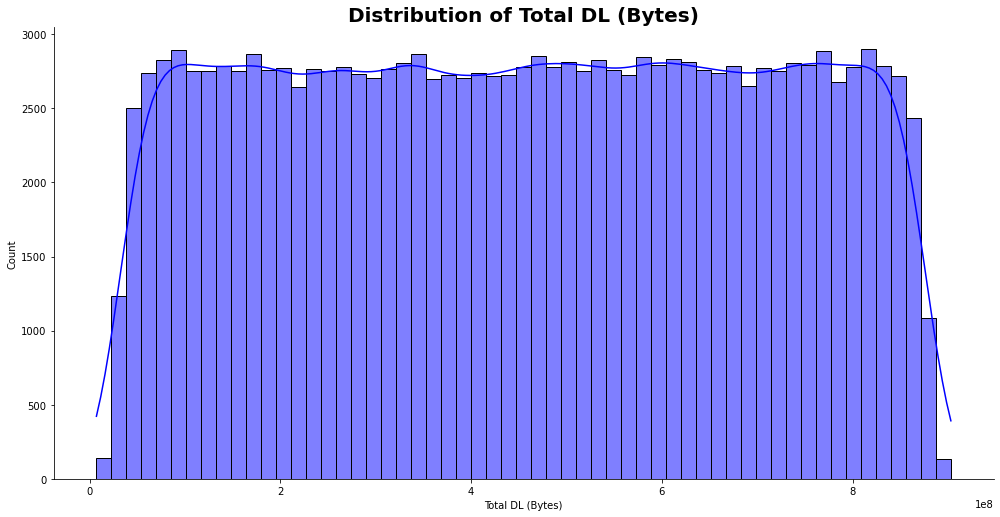

In [65]:
plot = PlotingUtils(clean_data)
plot.plot_hist(df=clean_data,column='Total DL (Bytes)',color='blue')

### Bi-Variate plots

In [54]:
# sns.pairplot(clean_data, hue='IMEI', diag_kind='kde',
#              plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'},
#              height=4)


### User Segmentation into Top Five Decile Classes

In [60]:
clean_data['decile_rank'] = pd.qcut(clean_data['Total DL (Bytes)'],10,labels=False)
clean_data.sort_values('decile_rank')

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes),decile_rank
101665,7349883256877440000,2019-04-26 18:38:18,330.0,2019-04-29 09:45:07,999.0,227209.0,2.082019e+14,3.363285e+10,3.574631e+13,T34452B,...,11829419.0,19598962.0,10444030.0,49969931.0,729003.0,560833685.0,15900403.0,42120473.0,95831918.0,0
86197,7277825665006640128,2019-04-27 12:26:19,898.0,2019-04-28 03:26:25,691.0,54005.0,2.082021e+14,3.365251e+10,3.554261e+13,D11879B,...,3790262.0,15356539.0,11773789.0,67196835.0,15660502.0,126434609.0,248428.0,35554517.0,106744533.0,0
86214,13042425971848400896,2019-04-27 12:26:45,217.0,2019-04-28 03:03:57,588.0,52632.0,2.082014e+14,3.367926e+10,3.579881e+13,L77565A,...,12071777.0,8519340.0,18557917.0,50565225.0,8812269.0,486109551.0,13640148.0,56148138.0,93649347.0,0
13840,7277825655695169536,2019-04-24 18:29:34,177.0,2019-04-25 01:03:17,60.0,23622.0,2.082017e+14,3.364573e+10,3.565581e+13,D61014C,...,10943759.0,3147830.0,3828435.0,25784989.0,10659315.0,562627358.0,9250500.0,38478096.0,52622130.0,0
86217,7277825665007979520,2019-04-27 12:26:48,286.0,2019-04-28 00:04:40,152.0,41871.0,2.082098e+14,3.366755e+10,3.572721e+13,T21031C,...,7641896.0,4529982.0,8666927.0,55279185.0,2556569.0,128886302.0,740749.0,24170623.0,96655976.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129954,7349883262061360128,2019-04-28 12:23:49,971.0,2019-04-30 05:57:20,963.0,149610.0,2.082022e+14,3.375390e+10,3.544291e+13,D10388B,...,20352330.0,10284378.0,14609486.0,793214088.0,7033613.0,155838726.0,14398347.0,57031159.0,817237190.0,9
88261,7277825665220429824,2019-04-27 13:41:43,842.0,2019-04-28 02:35:03,430.0,46399.0,2.082015e+14,3.367358e+10,3.572271e+13,T15153B,...,16514443.0,21955236.0,20030710.0,775414076.0,9083270.0,719421744.0,7127037.0,56284550.0,821321877.0,9
138007,6917537699648589824,2019-04-29 02:41:00,295.0,2019-04-30 02:41:08,266.0,86407.0,2.082017e+14,3.363002e+10,1.320100e+12,G71679A,...,21449798.0,15312856.0,2666163.0,786597296.0,15469552.0,332789797.0,10100138.0,51442385.0,821837975.0,9
20752,7277825656018429952,2019-04-24 20:16:54,679.0,2019-04-25 03:09:16,977.0,24742.0,2.082017e+14,3.361152e+10,3.530271e+13,T94371B,...,3166333.0,19308457.0,1507046.0,815151458.0,4993626.0,174602092.0,12810023.0,26192097.0,852946630.0,9


## Correlation

<AxesSubplot:>

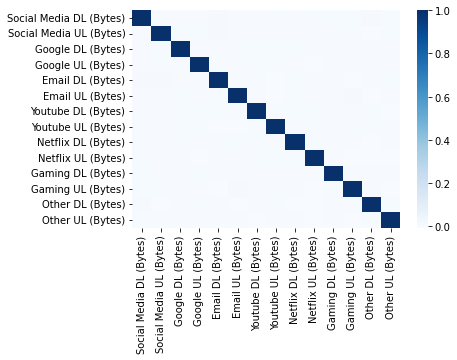

In [56]:
corr = clean_data[['Social Media DL (Bytes)','Social Media UL (Bytes)', 
 'Google DL (Bytes)', 'Google UL (Bytes)',
'Email DL (Bytes)', 'Email UL (Bytes)',
'Youtube DL (Bytes)','Youtube UL (Bytes)', 
'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 
'Other DL (Bytes)', 'Other UL (Bytes)']].corr()

# plot the heatmap
sns.heatmap(corr,cmap='Blues',
            xticklabels=corr.columns,
            yticklabels=corr.columns)


### Dimensionality reduction

In [57]:
numeric_df = clean_data.select_dtypes(include='float64')
numeric_df.shape

(148935, 36)

In [58]:
from sklearn.decomposition import PCA

# You must normalize the data before applying the fit method
df_normalized = (numeric_df - numeric_df.mean()) / numeric_df.std()
pca = PCA(n_components=numeric_df.shape[1])
principalDf = pca.fit_transform(df_normalized)

# # Reformat and view results
# loadings = pd.DataFrame(pca.components_.T,
#                             columns=['PC%s' % _ for _ in range(
#                                 len(df_normalized.columns))],
#                         index=numeric_df.columns)
# loadings.head(50)
principalDf = pd.DataFrame(data=principalDf, columns=['PC%s' % _ for _ in range(
                                    len(df_normalized.columns))])
principalDf


,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,...,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35
0,-5.450058,23.145150,0.118839,0.846830,2.247379,-17.937307,-0.915852,0.261204,-0.189831,0.294168,...,0.305522,-0.490067,-0.158043,0.103012,0.111094,-0.213666,-0.054587,-3.313074e-06,-2.764186e-16,5.223243e-15
1,-4.295786,16.989246,0.482001,-2.021062,1.682227,-13.011841,0.419248,1.957635,0.743858,0.120665,...,0.251093,-0.286505,-0.112414,0.065101,0.074452,-0.148018,-0.038085,1.291340e-06,-1.569597e-14,9.656405e-15
2,-4.317517,16.940078,0.414624,1.887425,1.617547,-13.024713,0.992518,0.740689,0.738842,1.408376,...,0.265105,-0.302353,-0.118622,0.069238,0.076155,-0.146291,-0.037498,-1.188543e-06,-4.206664e-14,1.636167e-14
3,-4.251819,16.367206,2.138802,-1.485250,1.615493,-12.582930,0.859325,1.603161,0.661696,-0.249342,...,0.195999,-0.370997,-0.113597,0.068415,0.057382,-0.143587,-0.036967,-1.508657e-06,-1.391964e-15,1.629592e-15
4,-3.671043,13.260525,1.013006,-0.109408,1.307281,-10.148622,-1.254490,2.045935,-0.078410,1.311573,...,0.176400,-0.235566,-0.080220,0.050429,0.055453,-0.109195,-0.028405,1.123019e-06,1.287703e-14,8.369465e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148930,4.182429,-2.330431,0.916791,-2.478269,-0.857502,-2.626661,-0.063302,-0.992018,-0.903159,0.644910,...,1.125132,-0.534756,-0.755779,0.205835,0.000827,0.095826,0.013907,-1.841951e-06,1.749385e-16,-1.118137e-17
148931,-1.279765,-0.325652,-0.537930,-2.125580,0.086105,0.556033,0.745942,-0.751494,0.775064,1.280441,...,-0.110114,-0.009657,0.003918,-0.014623,-0.026378,0.032747,0.008131,-2.266411e-06,2.713655e-16,3.370433e-16
148932,-1.325055,-0.119456,1.155711,-0.465372,0.068638,0.369840,0.807253,0.303208,0.441574,-1.228655,...,-0.125195,-0.001955,-0.000764,-0.012138,-0.020313,0.028957,0.007117,-1.701076e-06,-4.958870e-18,-9.306745e-17
148933,-1.330626,-0.097416,1.096194,0.237542,0.054352,0.342209,-0.269815,-0.816363,0.418269,-0.442723,...,-0.122058,-0.009379,0.003735,-0.007636,-0.028710,0.029990,0.007106,-1.718089e-07,-9.242286e-17,-1.524046e-17


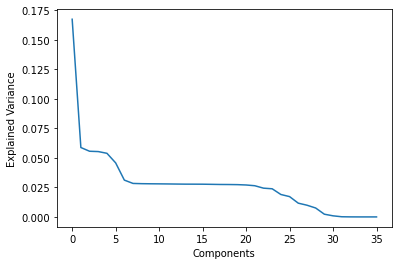

In [59]:
plt.plot(pca.explained_variance_ratio_)
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.show()


EVR is going to sum up to 1.0 every time you use all of your principal components, so it does not depend on the amount of features you use. In simple terms, PCA is going to decompose your dataset into n_features vectors sorted by their explained variance and then you may choose to take only top-n_components of those. If n_components==n_features, the original dataset can be fully restored from the decomposition, and EVR=1.0. If you take less components, depending on what their explained variance is, the EVR will get smaller. So in your case, if you take 7 features, you'll see that keeping top-3 components yields X EVR, and if you take 3 features, you'll see that keeping top-3 components yields 1.0 EVR, because n_features==n_components, but if you keep top-2 features, EVR is probably going to be Y < 1.0.